<a href="https://colab.research.google.com/github/HEOJIBEOM/Maritime-Data-Minin/blob/main/11%EC%A3%BC%EC%B0%A8%20%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
raw_ca_df = pd.read_csv('./ca-coviddata.csv')
raw_il_df = pd.read_csv('./il-coviddata.csv')
raw_tx_df = pd.read_csv('./tx-coviddata.csv')
raw_va_df = pd.read_csv('./va-coviddata.csv')
raw_wa_df = pd.read_csv('./wa-coviddata.csv')
raw_ca_df.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,01/23/2020,CA,01/16/2020,01/22/2020,0,0,0,0,0,0
1,01/30/2020,CA,01/23/2020,01/29/2020,2,2,0,0,0,0
2,02/06/2020,CA,01/30/2020,02/05/2020,8,6,0,0,0,0
3,02/13/2020,CA,02/06/2020,02/12/2020,16,8,0,0,0,0
4,02/20/2020,CA,02/13/2020,02/19/2020,30,14,0,0,0,0


In [119]:
raw_ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_updated         173 non-null    object
 1   state                173 non-null    object
 2   start_date           173 non-null    object
 3   end_date             173 non-null    object
 4   tot_cases            173 non-null    int64 
 5   new_cases            173 non-null    int64 
 6   tot_deaths           173 non-null    int64 
 7   new_deaths           173 non-null    int64 
 8   new_historic_cases   173 non-null    int64 
 9   new_historic_deaths  173 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 13.6+ KB


In [120]:
ca_total_cases = raw_ca_df[['tot_cases', 'date_updated']]
ca_dateindex_df = ca_total_cases.set_index('date_updated')

il_total_cases = raw_il_df[['tot_cases', 'date_updated']]
il_dateindex_df = il_total_cases.set_index('date_updated')

tx_total_cases = raw_tx_df[['tot_cases', 'date_updated']]
tx_dateindex_df = tx_total_cases.set_index('date_updated')

va_total_cases = raw_va_df[['tot_cases', 'date_updated']]
va_dateindex_df = va_total_cases.set_index('date_updated')

wa_total_cases = raw_wa_df[['tot_cases', 'date_updated']]
wa_dateindex_df = wa_total_cases.set_index('date_updated')

ca_dateindex_df.head()

,tot_cases
date_updated,
01/23/2020,0
01/30/2020,2
02/06/2020,8
02/13/2020,16
02/20/2020,30


In [131]:
CA_population = 38_900_000
IL_population = 12_600_000
TX_population = 30_500_000
VA_population = 8_700_000
WA_population = 7_900_000
USA_population = 338_289_856

ca_rate = round((CA_population / USA_population),5)
il_rate = round((IL_population / USA_population),5)
tx_rate = round((TX_population / USA_population),5)
va_rate = round((VA_population / USA_population),5)
wa_rate = round((WA_population / USA_population),5)

print(ca_rate)
print(il_rate)
print(tx_rate)
print(va_rate)
print(wa_rate)


0.11499
0.03725
0.09016
0.02572
0.02335


In [132]:
ca_dateindex_df = ca_dateindex_df.groupby(level=0).mean()
il_dateindex_df = il_dateindex_df.groupby(level=0).mean()
tx_dateindex_df = tx_dateindex_df.groupby(level=0).mean()
va_dateindex_df = va_dateindex_df.groupby(level=0).mean()
wa_dateindex_df = wa_dateindex_df.groupby(level=0).mean()
usa_date_index_df = usa_date_index_df.groupby(level=0).mean()

final_df = pd.concat([
    ca_dateindex_df['tot_cases'] * ca_rate,
    il_dateindex_df['tot_cases'] * il_rate,
    tx_dateindex_df['tot_cases'] * tx_rate,
    va_dateindex_df['tot_cases'] * va_rate,
    wa_dateindex_df['tot_cases'] * wa_rate,
    usa_date_index_df['tot_cases']
], axis=1)

final_df.columns = ['CA', 'IL', 'TX', 'VA', 'WA', 'USA']
final_df.head()


,CA,IL,TX,VA,WA,USA
date_updated,,,,,,
01/05/2023,1.364979e+06,148276.00900,741615.22736,56887.98468,44121.66965,1.684149e+06
01/06/2022,6.706888e+05,85505.32625,447974.02496,30526.73364,21324.94790,9.646244e+05
01/07/2021,2.969298e+05,37223.47800,169649.83448,9704.38748,6121.29590,3.565469e+05
01/12/2023,1.370100e+06,148920.91825,744754.95920,57342.14844,44249.02055,1.691394e+06
01/13/2022,7.616406e+05,93979.99925,481845.87472,33828.38432,23921.58465,1.055902e+06


<Axes: xlabel='date_updated'>

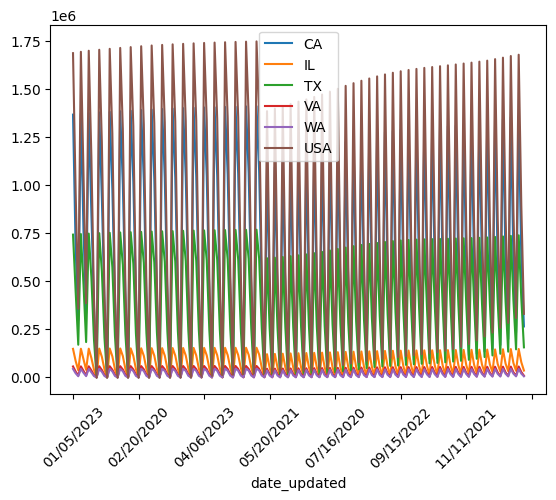

In [133]:
final_df.plot.line(rot=45)